# P-Book Recommendation

## Business Objective:
### Generate the features from the dataset and use them to recommend the books accordingly to the users.

## Import necessary libraries

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [180]:
User = pd.read_csv("Users (2).csv")
Book = pd.read_csv("Books (2).csv")
Ratings = pd.read_csv("Ratings (1).csv")

## User_Data

In [182]:
User.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [183]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [184]:
User.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [185]:
User.shape

(278858, 3)

## Book_Data

In [187]:
Book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [188]:
Book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [189]:
Book.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [190]:
Book.shape

(271360, 8)

## Ratings_Data

In [192]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [193]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [194]:
Ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [195]:
Ratings.shape

(1149780, 3)

## EDA Processing

## User dataset

In [198]:
User.columns= User.columns.str.strip().str.lower().str.replace('-', '_')

In [199]:
User.shape

(278858, 3)

In [200]:
User.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [201]:
User.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [202]:
User['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [203]:
# replacing nan with average of 'age'
User['age'].fillna((User['age'].mean()), inplace=True)

In [204]:
User.isnull().sum()

user_id     0
location    0
age         0
dtype: int64

In [205]:
Book.duplicated().any()

False

In [206]:
# retrieving age data between 5 to 90
User.loc[(User['age'] > 90) | (User['age'] < 5)] = np.nan

In [207]:
User['age'].fillna((User['age'].mean()), inplace=True)

In [208]:
User['age'] = User['age'].astype(int)

In [209]:
User.head()

,user_id,location,age
0,1.0,"nyc, new york, usa",34
1,2.0,"stockton, california, usa",18
2,3.0,"moscow, yukon territory, russia",34
3,4.0,"porto, v.n.gaia, portugal",17
4,5.0,"farnborough, hants, united kingdom",34


In [210]:
User.shape

(278858, 3)

## Book dataset

In [212]:
Book.columns= Book.columns.str.strip().str.lower().str.replace('-', '_')

In [213]:
Book.shape

(271360, 8)

In [214]:
Book.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l'],
      dtype='object')

In [215]:
# droping the url
Book.drop(['image_url_s','image_url_m', 'image_url_l'], axis= 1, inplace= True)

In [216]:
pd.set_option('display.max_colwidth', None)

In [217]:
Book.isnull().sum()

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64

In [218]:
# getting unique value from 'year_of_publication' feature
Book['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [219]:
Book = Book[~Book['year_of_publication'].isin(['DK Publishing Inc', 'Gallimard','0'])]
Book.reset_index(drop=True, inplace=True)

In [220]:
Book.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication',
       'publisher'],
      dtype='object')

In [221]:
Book.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [222]:
Book['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '1997', '2001', '1974', '1968', '1987', '1984', '1988', '1963',
       '1956', '1970', '1985', '1978', '1973', '1980', '19

In [223]:
Book.dropna(subset=['book_author','publisher'],inplace=True)

In [224]:
Book.duplicated().any()

False

In [225]:
Book.shape

(270305, 5)

## Ratings dataset

In [227]:
Ratings.columns= Ratings.columns.str.strip().str.lower().str.replace('-', '_')

In [228]:
Ratings.shape

(1149780, 3)

In [229]:
Ratings.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

In [230]:
Ratings.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [231]:
Ratings.duplicated().any()

False

In [232]:
Ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

## Data Visualizations

### User Dataset

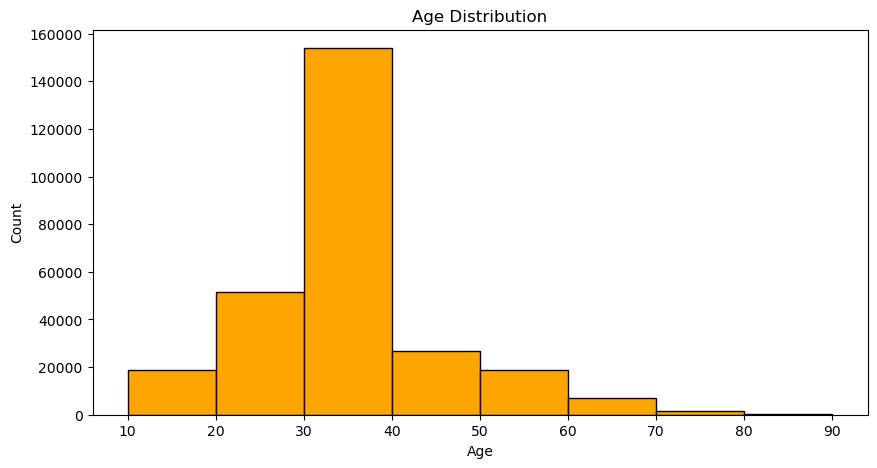

In [235]:
plt.figure(figsize=(10, 5))
plt.hist(User['age'], bins=[10 * i for i in range(1, 10)], color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)
plt.show()

### Book dataset

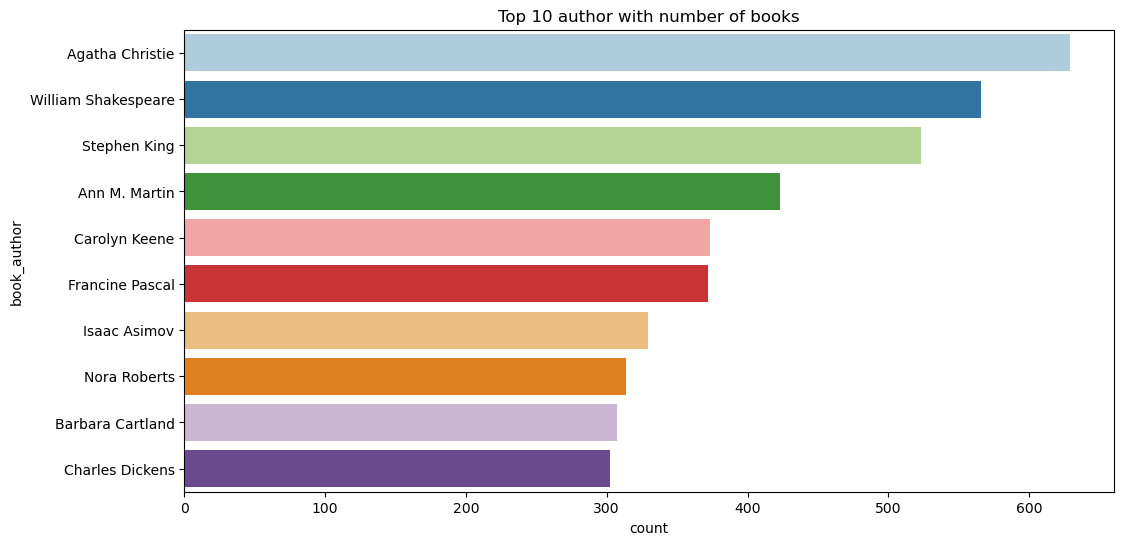

In [237]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=Book,order=Book['book_author'].value_counts().index[0:10])
plt.title("Top 10 author with number of books")
plt.show()

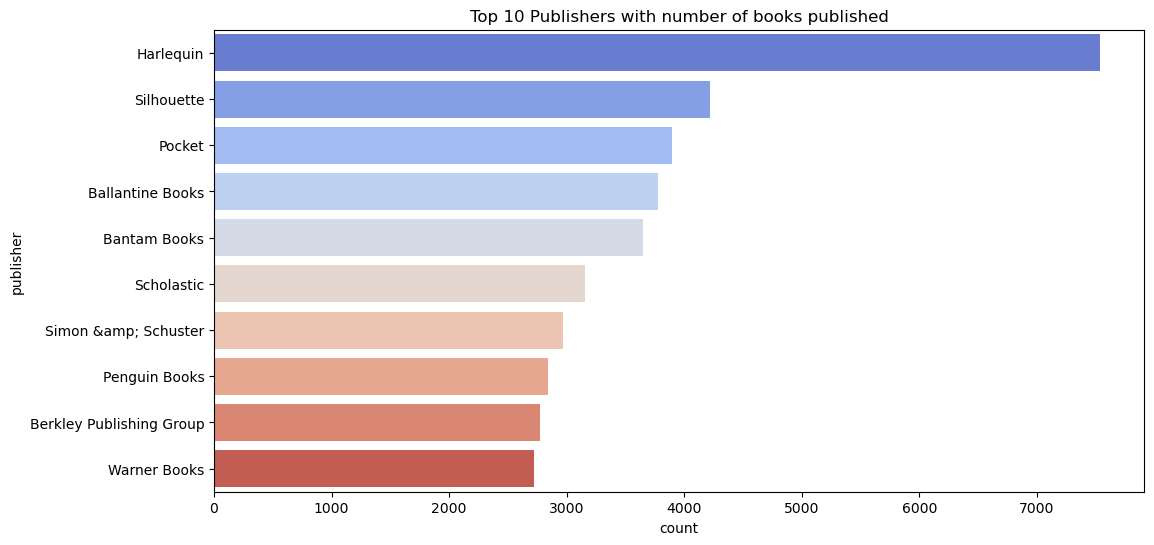

In [238]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'coolwarm', data=Book,order=Book['publisher'].value_counts().index[0:10])
plt.title("Top 10 Publishers with number of books published")
plt.show()

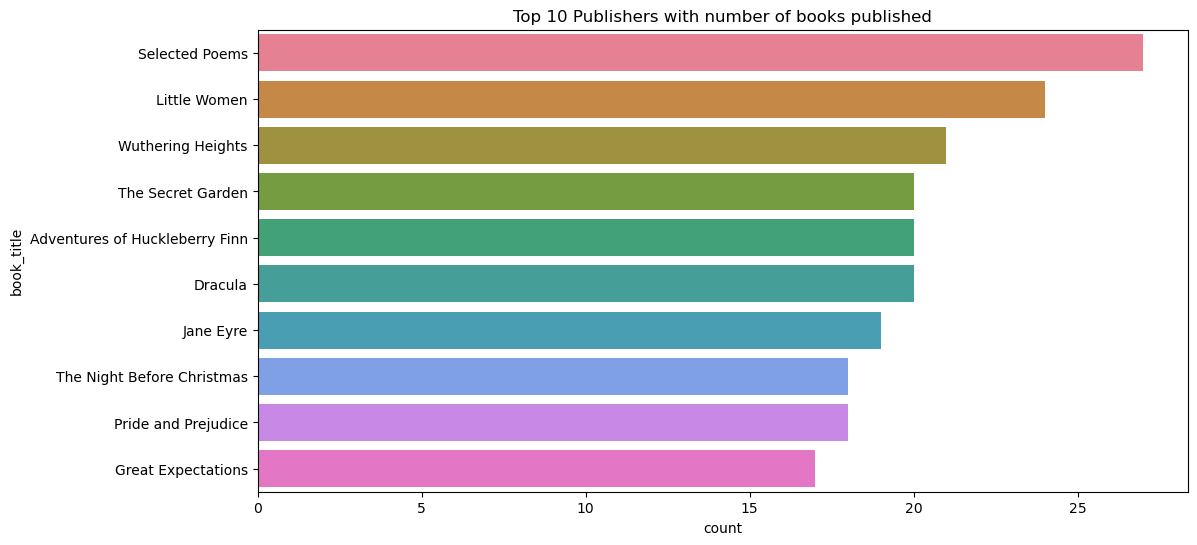

In [239]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'husl', data=Book,order=Book['book_title'].value_counts().index[0:10])
plt.title("Top 10 Publishers with number of books published")
plt.show()

### Ratings Dataset

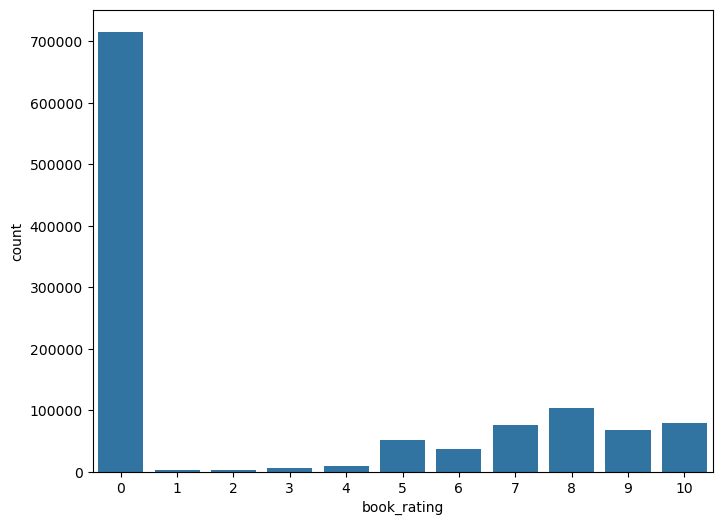

In [241]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",data=Ratings)
plt.show()

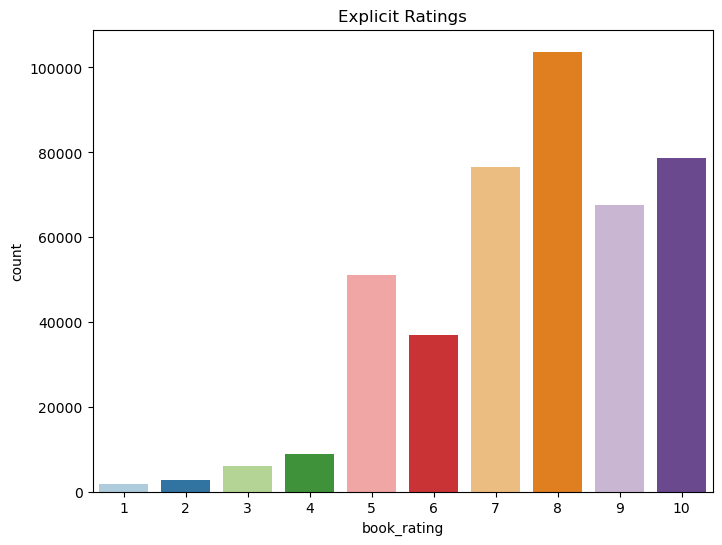

In [242]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = Ratings[Ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")
plt.show()

## Outliers Detection Using IQR Method

In [244]:
# Function to detect outliers using IQR method for all numeric columns
def detect_outliers_iqr(df, name):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_report = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_report[col] = []
        {
            'Total': df.shape[0],
            'Outliers': outliers.shape[0],
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound
        }
    
    return pd.DataFrame(outlier_report).T.rename_axis(f"{name} Columns").reset_index()

# Detect outliers in each dataset
user_outliers = detect_outliers_iqr(User, "User")
book_outliers = detect_outliers_iqr(Book, "Book")
rating_outliers = detect_outliers_iqr(Ratings, "Rating")

In [245]:
print(user_outliers)

  User Columns
0      user_id


In [246]:
print(book_outliers)

Empty DataFrame
Columns: [Book Columns]
Index: []


In [247]:
print(rating_outliers)

  Rating Columns
0        user_id
1    book_rating


In [248]:
Book.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication',
       'publisher'],
      dtype='object')

In [249]:
User.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [250]:
Ratings.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

## Merging the Dataset

In [252]:
Rating_Books = Ratings.merge(Book, on='isbn')
User_Rating_Books = Rating_Books.merge(User, on='user_id')
User_Rating_Books.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",34
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",34
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16


In [253]:
User_Rating_Books.shape

(1024897, 9)

In [254]:
User_Rating_Books.isnull().sum()

user_id                0
isbn                   0
book_rating            0
book_title             0
book_author            0
year_of_publication    0
publisher              0
location               0
age                    0
dtype: int64

In [398]:
User_Rating_Books.to_csv('User_Rating_Books.csv', index=False)

## Popularity Based Recommendation System

In [256]:
# Count the number of ratings per book
Pop_rating = pd.DataFrame(User_Rating_Books.groupby('book_title')['book_rating'].count())

# Rename the column for clarity
Pop_rating.rename(columns={'book_rating': 'Book_Ratings'}, inplace=True)

# Filter to include only books with more than, say, 50 ratings
Pop_rating = Pop_rating[Pop_rating['Book_Ratings'] >= 50]
Pop_rating = Pop_rating.sort_values('Book_Ratings', ascending=False)


# Show top 10
Pop_rating.head(10)

,Book_Ratings
book_title,
Wild Animus,2494
The Lovely Bones: A Novel,1288
The Da Vinci Code,891
A Painted House,834
The Nanny Diaries: A Novel,823
Bridget Jones's Diary,814
The Secret Life of Bees,770
Divine Secrets of the Ya-Ya Sisterhood: A Novel,737
The Red Tent (Bestselling Backlist),722


## User Based Recommendation System

In [258]:
# Count the number of ratings per book
User_Pop = pd.DataFrame(User_Rating_Books.groupby('user_id')['book_rating'].count())

# Rename the column for clarity
User_Pop.rename(columns={'book_rating': 'Book_Ratings'}, inplace=True)

# Filter to include only books with more than, say, 50 ratings
User_Pop = User_Pop[User_Pop['Book_Ratings'] >= 50]
User_Pop = User_Pop.sort_values('Book_Ratings', ascending=False)


# Show top 10
User_Pop.head(10)

,Book_Ratings
user_id,
11676,11116
198711,6451
153662,5806
98391,5777
35859,5639
212898,4282
278418,3982
76352,3329
110973,2970


## Model Building

In [260]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [261]:
User_Rating_Books.columns

Index(['user_id', 'isbn', 'book_rating', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'location', 'age'],
      dtype='object')

In [262]:
print("Unique users:", User_Rating_Books['user_id'].nunique())
print("Unique books:", User_Rating_Books['book_title'].nunique())

Unique users: 91630
Unique books: 239596


In [263]:
# Filter books rated by at least 10 users
popular_books = User_Rating_Books['book_title'].value_counts()[User_Rating_Books['book_title'].value_counts() >= 10].index
filtered_data = User_Rating_Books[User_Rating_Books['book_title'].isin(popular_books)]

# Filter users who have rated at least 10 books
active_users = filtered_data['user_id'].value_counts()[filtered_data['user_id'].value_counts() >= 10].index
filtered_data = filtered_data[filtered_data['user_id'].isin(active_users)]


In [264]:
matrix = filtered_data.pivot_table(index='user_id', columns='book_title', values='book_rating', aggfunc='mean').fillna(0)
matrix.shape

(7715, 17337)

In [265]:
sparse_matrix = csr_matrix(matrix.values)

In [266]:
dense_array = sparse_matrix.toarray()
dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [267]:
sparse_df = pd.DataFrame(dense_array, columns=matrix.columns,index=matrix.index)
sparse_df.head()

book_title,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth","Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",!Yo!,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,...,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),one hundred years of solitude,stardust,why I'm like this : True Stories
user_id,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Computing similarities

## Cosine_Similarity

### User_Based

In [270]:
df1 = filtered_data.pivot_table(index='user_id',columns='book_title',values='book_rating')
df1.fillna(0,axis=1,inplace=True)
df1.head()

book_title,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth","Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",!Yo!,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,...,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),one hundred years of solitude,stardust,why I'm like this : True Stories
user_id,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
cos_similar = cosine_similarity(df1)

In [272]:
cos_similar.shape

(7715, 7715)

In [273]:
cos_similar[0]

array([1.       , 0.       , 0.       , ..., 0.       , 0.0362041,
       0.       ])

In [274]:
df1.index

Index([   243,    254,    383,    388,    424,    446,    487,    503,    505,
          507,
       ...
       278314, 278356, 278390, 278418, 278522, 278535, 278554, 278582, 278633,
       278843],
      dtype='int64', name='user_id', length=7715)

In [362]:
def recommended_book_user(book_name):
    if book_name in df1.index:
        index = np.where(book_name==df1.index)[0][0]
        similar = sorted(list(enumerate(cos_similar[index])),reverse=True,key=lambda x: x[1])[1:6]
        print(f'Recommended Book {book_name}')
        #print('Recommended product of'product_name)
        print('-'*25)
        for book in similar:
            print(df1.index[book[0]])
    else:
        print('Book not found!!!')

In [364]:
User_Rating_Books.iloc[243]['book_title']

'Die StÃ?Â¶renfrieds. Geschichten von Leo und Paulina.'

In [366]:
recommended_book_user(156140)

Recommended Book 156140
-------------------------
141876
45904
194699
100460
139209


### Book_Based

In [360]:
df2 = filtered_data.pivot_table(index='book_title',columns='user_id',values='book_rating')
df2.fillna(0,axis=1,inplace=True)
df2.head(3)

user_id,243,254,383,388,424,446,487,503,505,507,...,278314,278356,278390,278418,278522,278535,278554,278582,278633,278843
book_title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [369]:
cos_similar = cosine_similarity(df2)

In [370]:
cos_similar.shape

(17337, 17337)

In [371]:
cos_similar[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [372]:
df2.index

Index([' Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth',
       ' Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750',
       ' Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback))',
       ' Q-Space (Star Trek The Next Generation, Book 47)',
       ' Q-Zone (Star Trek The Next Generation, Book 48)', '!Yo!',
       ''Salem's Lot',
       '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
       '01-01-00: A Novel of the Millennium',
       '01-01-00: The Novel of the Millennium',
       ...
       '\O\" Is for Outlaw"',
       '\Surely You're Joking, Mr. Feynman!\": Adventures of a Curious Character"',
       '\The Happy Prince\" and Other Stories (Penguin Popular Classics)"',
       '\What Do You Care What Other People Think?\": Further Adventures of a Curious Character"',
       'e', 'iI Paradiso Degli Orchi',
       'murder@maggody.com : An Arly Hanks Mystery (Arly Hanks M

In [394]:
def recommended_book(book_name):
    if book_name in df2.index:
        index = df2.index.get_loc(book_name)  # safe lookup
        similar = sorted(list(enumerate(cos_similar[index])), reverse=True, key=lambda x: x[1])[1:6]
        print(f'Recommended Books for: {book_name}')
        print('-'*30)
        for book in similar:
            print(df2.index[book[0]])
    else:
        print('Book not found! Please check the title.')


In [396]:
recommended_book("why I'm like this : True Stories")

Recommended Books for: why I'm like this : True Stories
------------------------------
Sirens
I Am Fifteen--And I Don't Want to Die
Don't Say a Word
McNally's Luck (Archy McNally Novels (Paperback))
Just Cause


## Clustering Algorithms

In [118]:
from sklearn.utils import resample
from tqdm import tqdm
std=StandardScaler()
scaled_matrix=std.fit_transform(matrix)

In [119]:
scaled_matrix=pd.DataFrame(scaled_matrix,columns=matrix.columns,index=matrix.index)
scaled_matrix.head()

book_title,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth","Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",!Yo!,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,...,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),one hundred years of solitude,stardust,why I'm like this : True Stories
user_id,,,,,,,,,,,,,,,,,,,,,
243,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.090744,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238
254,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.090744,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238
383,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.090744,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238
388,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.090744,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238
424,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.090744,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238


### K-Means Clustering

In [121]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans_cluster=kmeans.fit(scaled_matrix)

In [122]:
kmeans_matrix=scaled_matrix
kmeans_matrix['cluster']=kmeans_cluster.labels_
kmeans_matrix.head()

book_title,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth","Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",!Yo!,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,...,"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),one hundred years of solitude,stardust,why I'm like this : True Stories,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
243,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,4
254,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,4
383,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,4
388,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,4
424,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,4


In [123]:
kmeans_cluster.cluster_centers_

array([[-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -2.42872622e-02, -4.76856113e-02, -2.22384570e-02],
       [-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -2.42872622e-02, -4.76856113e-02, -2.22384570e-02],
       [-2.56266032e-02, -1.94219386e-02,  4.94944689e+01, ...,
        -2.42872622e-02, -4.76856113e-02, -2.22384570e-02],
       [-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -2.42872622e-02, -4.76856113e-02, -2.22384570e-02],
       [ 1.66190682e-05,  1.25952909e-05, -6.40656604e-03, ...,
         1.57504943e-05,  3.09245209e-05,  1.44218269e-05]])

### Elbow graph approch to find most appropriate number of clusters

In [125]:
sample = resample(scaled_matrix, n_samples=800, random_state=42)  # Or even 500

In [126]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(sample)
    inertia.append(kmeans.inertia_)
print(inertia)

[12316372.59886272, 12293618.91206251, 12239715.368892709, 12135417.959343083, 12003108.606703661, 11917535.644246185, 11847610.040456891, 11581669.308859345, 11313222.836465243, 11245429.342991509]


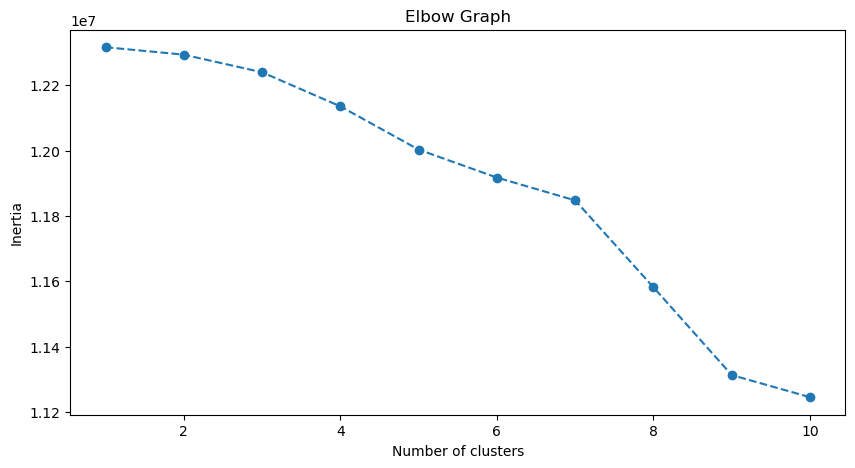

In [127]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),inertia,marker='o',linestyle='--')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [128]:
kmeans1=KMeans(n_clusters=6,random_state=42)
kmeans_cluster1=kmeans1.fit(scaled_matrix)
kmeans_matrix1=scaled_matrix
kmeans_matrix1['cluster']=kmeans_cluster1.labels_
kmeans_matrix1.head()

book_title,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth","Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",!Yo!,'Salem's Lot,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,...,"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""",e,iI Paradiso Degli Orchi,murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),one hundred years of solitude,stardust,why I'm like this : True Stories,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
243,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,3
254,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,3
383,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,3
388,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,3
424,-0.025627,-0.019422,-0.024961,-0.022106,-0.016037,-0.025387,-0.044137,-0.020946,-0.011386,-0.026918,...,-0.049401,-0.019506,-0.022662,-0.044151,-0.016075,-0.022527,-0.024287,-0.047686,-0.022238,3


In [129]:
kmeans_cluster1.cluster_centers_

array([[-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -4.76856113e-02, -2.22384570e-02,  0.00000000e+00],
       [-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -4.76856113e-02, -2.22384570e-02,  1.00000000e+00],
       [-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -4.76856113e-02, -2.22384570e-02,  4.00000000e+00],
       [ 1.99454688e-05,  1.51163097e-05,  1.94275684e-05, ...,
         3.71142389e-05,  1.73084372e-05,  3.99961084e+00],
       [-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -4.76856113e-02, -2.22384570e-02,  4.00000000e+00],
       [-2.56266032e-02, -1.94219386e-02, -2.49611875e-02, ...,
        -4.76856113e-02, -2.22384570e-02,  4.00000000e+00]])

In [130]:
pca=PCA(n_components=2)
scaled_matrix_pca=pca.fit_transform(scaled_matrix)
scaled_matrix_pcad=pd.DataFrame(scaled_matrix_pca,columns=['PC1','PC2'])
scaled_matrix_pcad['k-Means']=kmeans_cluster1.labels_
scaled_matrix_pcad.head()

,PC1,PC2,k-Means
0,-0.801133,-0.794125,3
1,-0.265698,1.095658,3
2,-1.257982,-0.678039,3
3,-0.958616,-0.766610,3
4,-1.459122,-0.620000,3


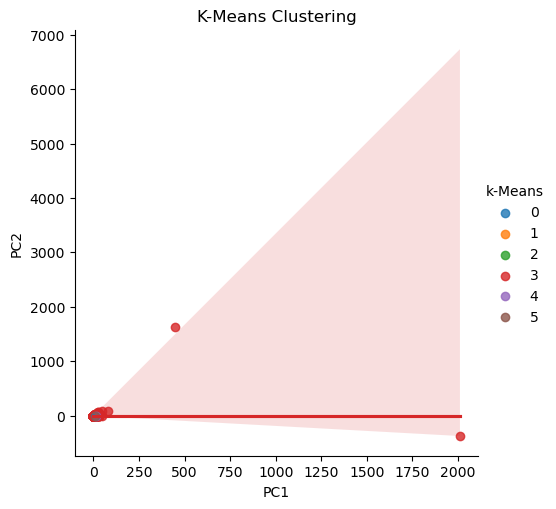

In [131]:
sns.lmplot(x='PC1',y='PC2',data=scaled_matrix_pcad,hue='k-Means')
plt.title('K-Means Clustering')
plt.show()

### Hierarchical Clustering

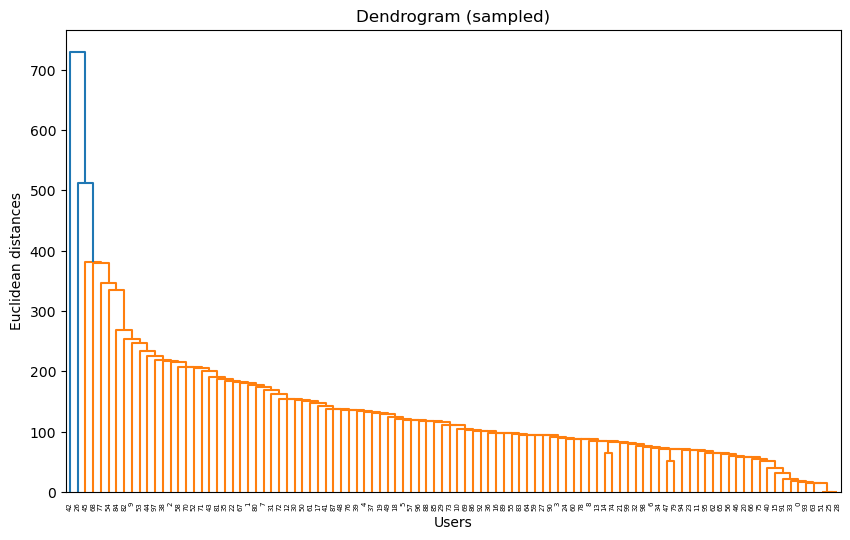

In [133]:
sample = resample(scaled_matrix, n_samples=100, random_state=42)

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(sample, method='ward'))
plt.title('Dendrogram (sampled)')
plt.xlabel('Users')
plt.ylabel('Euclidean distances')
plt.show()


In [134]:
agg=AgglomerativeClustering(n_clusters=5)
hierarchical_cluster=agg.fit(scaled_matrix)
hierarchical_cluster

AgglomerativeClustering(n_clusters=5)

In [135]:
scaled_matrix_pcad['Hierarchial']=hierarchical_cluster.labels_
scaled_matrix_pcad.head()

,PC1,PC2,k-Means,Hierarchial
0,-0.801133,-0.794125,3,0
1,-0.265698,1.095658,3,0
2,-1.257982,-0.678039,3,0
3,-0.958616,-0.766610,3,0
4,-1.459122,-0.620000,3,0


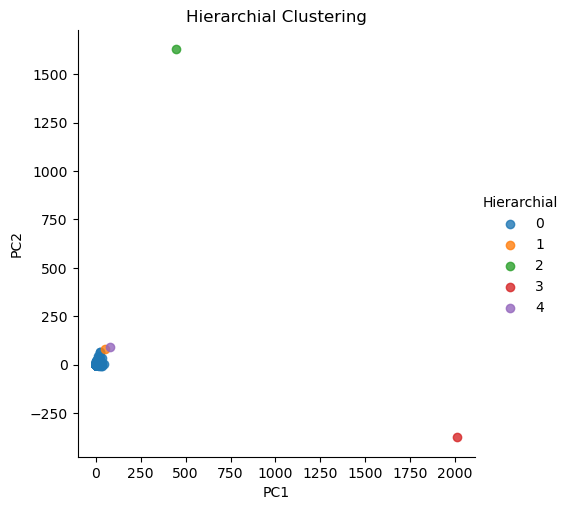

In [136]:
sns.lmplot(data=scaled_matrix_pcad,x='PC1',y='PC2',hue='Hierarchial')
plt.title('Hierarchial Clustering')
plt.show()

### DBSCAN

In [138]:
# Sample only 500 users for fast experimentation
sample_data = resample(scaled_matrix, n_samples=250, random_state=42)

In [139]:
eps = [0.1, 0.2, 0.3, 0.4, 0.5]
min_node = range(1, 11)
sil_score = []

for ep in tqdm(eps, desc="Epsilon loop"):
    for mn in tqdm(min_node, leave=False, desc=f"min_samples for eps={ep}"):
        labels = DBSCAN(eps=ep, min_samples=mn).fit(sample_data).labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(sample_data, labels)
        else:
            score = -1

        sil_score.append([ep, mn, score])

Epsilon loop: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.17s/it]


In [140]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)  # You can tweak eps and min_samples
dbscan_cluster.fit(scaled_matrix_pcad)

DBSCAN()

In [141]:
sil=pd.DataFrame(sil_score)

In [142]:
scaled_matrix_pcad['DBSCAN']= dbscan_cluster.labels_
scaled_matrix_pcad.head()

,PC1,PC2,k-Means,Hierarchial,DBSCAN
0,-0.801133,-0.794125,3,0,0
1,-0.265698,1.095658,3,0,0
2,-1.257982,-0.678039,3,0,0
3,-0.958616,-0.766610,3,0,0
4,-1.459122,-0.620000,3,0,0


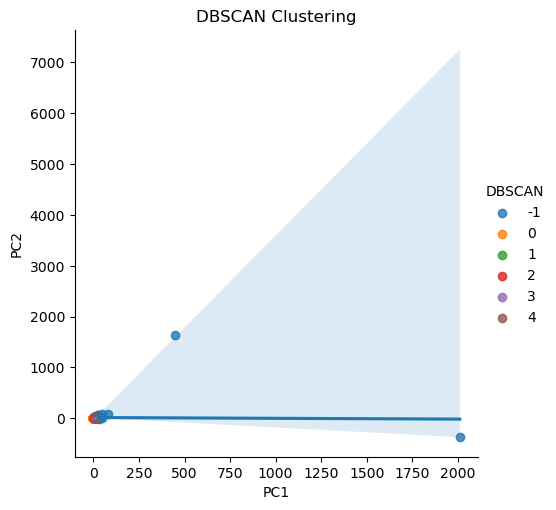

In [143]:
sns.lmplot(data=scaled_matrix_pcad,x='PC1',y='PC2',hue='DBSCAN')
plt.title('DBSCAN Clustering')
plt.show()

### Comparing the performance of each model to find most appropriate model

In [145]:
from sklearn.metrics import silhouette_score
print('KMeans Model Silhouette Score : ',silhouette_score(scaled_matrix,kmeans_cluster.labels_))
print('\nKMeans Model Silhouette Score after using elbow method : ',silhouette_score(scaled_matrix,kmeans_cluster1.labels_))
print('\nHierarchial Clustering Silhouette Score : ',silhouette_score(scaled_matrix,hierarchical_cluster.labels_))

KMeans Model Silhouette Score :  -0.040529482279824364

KMeans Model Silhouette Score after using elbow method :  -0.04153864267472776

Hierarchial Clustering Silhouette Score :  0.7750427509576228


In [146]:
print('\nDBSCAN Silhouette Score : ',silhouette_score(scaled_matrix,dbscan_cluster.labels_))


DBSCAN Silhouette Score :  0.42900270320053


### Model deployment

In [154]:
import pickle
file = 'Book_Recmd.pkl'

In [156]:
pickle.dump(hierarchical_cluster,open(file,'wb'))    